<a href="https://colab.research.google.com/github/igt14/MatchPrediction/blob/main/Moringa_Data_Science_Module2_W1_Independent_Project_2021_08_Ian_Gathumbi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime as dt

# 2. Loading the data

In [2]:
# Loading the fifa ranking dataset
ranking = pd.read_csv('/content/fifa_ranking.csv')

In [3]:
# Loading the results dataset
results = pd.read_csv('/content/results.csv')

# 3. Previewing the datasets

In [7]:
def rows_and_columns(df):
  print(str(df.shape[0]), 'rows and', str(df.shape[1]), 'columns')

In [11]:
# Checking the number of records
# Ranking
print('Ranking :')
rows_and_columns(ranking)
# Results
print('Results :')
rows_and_columns(results)

Ranking :
57793 rows and 16 columns
Results :
40839 rows and 9 columns


In [12]:
# Checking the information on ranking
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [13]:
# Checking the information on results
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [14]:
# Previewing the top of ranking
ranking.head()  

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [15]:
# Previewing the top of results
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [16]:
# Previewing the bottom of ranking
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [17]:
# Previewing the bottom of results
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


# 4. Data preparation

## 4.1 Dropping irrelevant columns

In [18]:
ranking.drop(labels=['country_abrv', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 
                     'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'],
             axis=1, inplace=True)

In [19]:
results.drop(labels=['city', 'country', 'neutral'], axis=1, inplace=True)

## 4.2 Column types

In [20]:
# Converting the date column type to datetime
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [21]:
results['date'] = pd.to_datetime(results['date'])

## 4.3 Checking for missing data

In [22]:
def missing(df):
  # Creating a dataframe showing percentage of missing values
  percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False).to_frame()

  # Renaming the column
  percentage.columns = ['Percentage Missing']

  # Returning a dataframe with the percentage of missing values
  return percentage

In [24]:
missing(ranking)

,Percentage Missing
rank_date,0.0
country_full,0.0
rank,0.0


In [25]:
missing(results)

,Percentage Missing
tournament,0.0
away_score,0.0
home_score,0.0
away_team,0.0
home_team,0.0
date,0.0


## 4.4 Checking for duplicates

In [26]:
ranking.duplicated().sum()

38

In [27]:
results.duplicated().sum()

1

In [28]:
# Checking the duplicated records
ranking[ranking.duplicated()]

,rank,country_full,rank_date
19889,112,Sudan,2003-02-19
41320,113,Sudan,2011-12-21
41536,120,Sudan,2012-01-18
41736,111,Sudan,2012-02-15
41944,110,Sudan,2012-03-07
42157,113,Sudan,2012-04-11
42366,113,Sudan,2012-05-09
42562,101,Sudan,2012-06-06
42775,105,Sudan,2012-07-04
42983,104,Sudan,2012-08-08


In [29]:
results[results.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament
35243,2013-06-22,Monaco,Vatican City,2,0,Friendly


The duplicates returned aren't actual duplicates so we won't drop them

## 4.5 Other cleaning procedures

In [30]:
# Dropping rows in results before 8/1993 and after 6/7/2018 as we don't have rankings for those periods
results = results[(results['date'] > '8/8/1993') & (results['date'] < '6/7/2018')]

In [31]:
# Creating a new column home result that shows whether the home team won, lost or drew
# This will be used in logistic regression
#
# Specifying the conditions for a win, loss and draw
conditions = [
              (results['home_score'] > results['away_score']),
              (results['home_score'] < results['away_score']),
              (results['home_score'] == results['away_score'])
]
# 2-win, 1-draw, 0-loss
values = [2, 0, 1]

# 
results['home_result'] = np.select(conditions, values)

results.head()

,date,home_team,away_team,home_score,away_score,tournament,home_result
17922,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,2
17923,1993-08-11,Faroe Islands,Norway,0,7,Friendly,0
17924,1993-08-11,Sweden,Switzerland,1,2,Friendly,0
17925,1993-08-15,Australia,Canada,2,1,FIFA World Cup qualification,2
17926,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,2


In [33]:
# We need to find out a team's rank on the date it played a specific match
# Rankings are more or less updated monthly so we need to match a team with its rank on the month and year it played
# To do this we modify the dates in both datasets to show the month and year only (we don't need the day)
ranking['rank_date'] = ranking['rank_date'].dt.strftime('%Y-%m')
results['date'] = results['date'].dt.strftime('%Y-%m')

In [36]:
# Next we merge the two datasets on the date and home team name to find the rank of the home team when it played a match
new_df = pd.merge(results, ranking,  how='left', left_on=['date','home_team'], right_on = ['rank_date','country_full'])

In [38]:
# We do the same thing but now with the away team name to find its rank when it played a match
new_df1 = pd.merge(new_df, ranking,  how='left', left_on=['date','away_team'], right_on = ['rank_date','country_full'])

In [40]:
# There will be some missing values since some teams played matches when the rankings weren't updated in that month or the team name does not match
# the country name
# Finding out what percerntage is missing because of this
missing(new_df1)

,Percentage Missing
rank_date_y,16.005794
country_full_y,16.005794
rank_y,16.005794
rank_date_x,15.593880
country_full_x,15.593880
rank_x,15.593880
home_result,0.000000
tournament,0.000000
away_score,0.000000
home_score,0.000000


In [41]:
# We will drop these missing records 
matches = new_df1.dropna(axis=0)

In [42]:
matches.shape

(16879, 13)

Despite the large number of missing values we still have a lot of data left for modelling. 

In [44]:
# Renaming the columns
matches = matches.rename({'rank_x' : 'home_rank', 'rank_y' : 'away_rank'}, axis=1)

In [47]:
# Dropping uneccessary columns
matches.drop(labels=['country_full_x', 'rank_date_x', 'country_full_y', 'rank_date_y'], axis=1, inplace=True)

# 5. Exploratory Data Analysis

In [67]:
# Mode of home team goals scored
results['home_score'].mode()

0    1
dtype: int64

The home team scores only 1 goal in most of the matches

In [50]:
def chart_elements(title, xlabel, ylabel):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

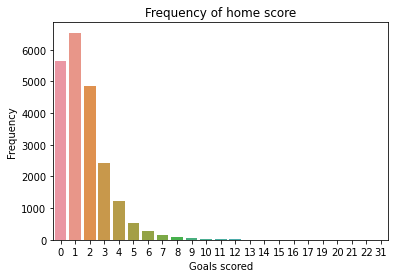

In [51]:
# Visualizing other home scores
sns.barplot(x=results['home_score'].value_counts().index, y=results['home_score'].value_counts())
chart_elements('Frequency of home score', 'Goals scored', 'Frequency')

In [53]:
# Mode of away team goals scored
results['away_score'].mode()

0    0
dtype: int64

The away team scores zero goals in most of the matches

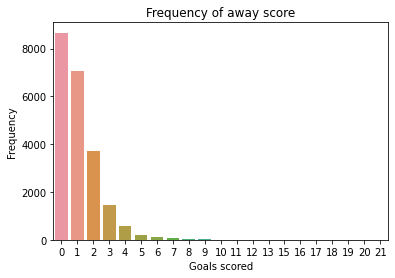

In [54]:
# Visualizing other away scores
sns.barplot(x=results['away_score'].value_counts().index, y=results['away_score'].value_counts())
chart_elements('Frequency of away score', 'Goals scored', 'Frequency')

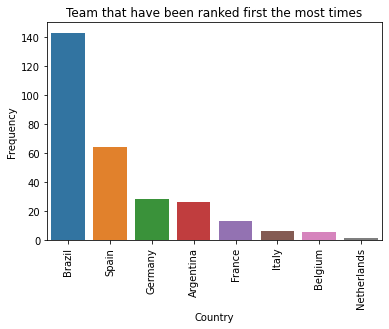

In [56]:
# Which team has been ranked first the most times?
sns.barplot(x=ranking[ranking['rank'] == 1]['country_full'].value_counts().index, y=ranking[ranking['rank'] == 1]['country_full'].value_counts())
plt.xticks(rotation='vertical')
chart_elements('Team that have been ranked first the most times', 'Country', 'Frequency')

Brazil has been ranked first the most times therefore it's probably been the best national side over the years

# 6. Polynomial Approach

Checking for multicollinearity

In [57]:
# Correlation matrix for the numerical variables
correlations = matches.corr()

In [58]:
# Calculating VIF
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home_result,home_rank,away_rank
home_score,1.883303,-0.697937,-1.324108,0.356699,-0.522753
away_score,-0.697937,1.941376,1.462769,-0.348018,0.325574
home_result,-1.324108,1.462769,2.810869,0.227177,-0.207184
home_rank,0.356699,-0.348018,0.227177,1.651025,-1.012515
away_rank,-0.522753,0.325574,-0.207184,-1.012515,1.757084


None of the variables have a VIF score greater than 10 so multicollinearity will not be a problem in our model

## 6.1 Predicting how many goals the home team scores

### 6.1.1 Building the model

In [59]:
# We will use the home team rank to model how many goals the home team scores
home_rank = matches.iloc[:, -2:-1].values
home_score = matches.iloc[:,3:4].values

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Splitting the dataset into train and test sets
home_rank_train, home_rank_test, home_score_train, home_score_test = train_test_split(home_rank, home_score, test_size = 0.2, random_state=0)

# Fitting a polynomial regression with a degree of 2 to the dataset
poly = PolynomialFeatures(degree = 2) 
home_rank_train_poly = poly.fit_transform(home_rank_train)
home_rank_test_poly = poly.transform(home_rank_test)

poly_reg = LinearRegression()
poly_reg.fit(home_rank_train_poly, home_score_train)

# Predicting the home score test set  
home_score_pred = poly_reg.predict(home_rank_test_poly)

# Finding the root mean squared error for our model
print('Root Mean Squared Error for our model is' , np.sqrt(metrics.mean_squared_error(home_score_test, home_score_pred))) 

Root Mean Squared Error for our model is 1.5924936304293293


### 6.1.2 Cross validation

In [62]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)

RMSES = [] # We will use this array to keep track of the RSME of each model
count =  1
for train_index, test_index in folds.split(home_rank):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  home_rank_train, home_rank_test = home_rank[train_index], home_rank[test_index]
  home_score_train, home_score_test = home_score[train_index], home_score[test_index]

  # Fitting a polynomial regression with a degree of 2 to the dataset
  poly = PolynomialFeatures(degree = 2) 
  home_rank_train_poly = poly.fit_transform(home_rank_train)
  home_rank_test_poly = poly.transform(home_rank_test)
  
  poly_reg = LinearRegression()
  poly_reg.fit(home_rank_train_poly, home_score_train)
  
  # Assessing the accuraccy of the model
  home_score_pred = poly_reg.predict(home_rank_test_poly)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(home_score_test, home_score_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 1.6500401221264456

Training model 2
Model 2 Root Mean Squared Error: 1.8108296256685577

Training model 3
Model 3 Root Mean Squared Error: 1.5316936749949628

Training model 4
Model 4 Root Mean Squared Error: 1.5063821437180946

Training model 5
Model 5 Root Mean Squared Error: 1.4822539235197518


The RMSE in model 1 and model 2 are fairly larger compared to the others suggesting that there are more outliers in their test sets.

### 6.1.3 Residual plots and heteroskedasticity testing



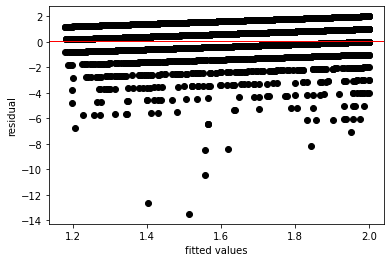

In [63]:
# Calculating the residuals
residuals = np.subtract(home_score_pred, home_score_test)

# Plotting a residual plot
plt.scatter(home_score_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [64]:
# Performing bartlett's test for heteroscedasticity
test_result, p_value = sp.stats.bartlett(home_score_pred.flatten(), residuals.flatten())
if p_value < 0.05:
  print('Reject null therefore variances are heteroscedastic')
else:
  print('Do not reject null therefore variances are homoscedastic')

Reject null therefore variances are heteroscedastic


The variances of the error terms vary significantly therefore our model is poorly defined and should be modified. 

## 6.2 Predicting how many goals the away team scores

### 6.2.1 Building the model

In [65]:
# We will use the away team rank to model how many goals the away team scores
away_rank = matches.iloc[:, -1:].values
away_score = matches.iloc[:,4:5].values

In [66]:
# Splitting the dataset into train and test sets
away_rank_train, away_rank_test, away_score_train, away_score_test = train_test_split(away_rank, away_score, test_size = 0.2, random_state=0)

# Fitting a polynomial regression with a degree of 2 to the dataset
poly = PolynomialFeatures(degree = 2) 
away_rank_train_poly = poly.fit_transform(away_rank_train)
away_rank_test_poly = poly.transform(away_rank_test)

poly_reg = LinearRegression()
poly_reg.fit(away_rank_train_poly, away_score_train)

# Predicting the home score test set  
away_score_pred = poly_reg.predict(away_rank_test_poly)

# Finding the root mean squared error for our model
print('Root Mean Squared Error for our model is' , np.sqrt(metrics.mean_squared_error(home_score_test, home_score_pred))) 

Root Mean Squared Error for our model is 1.4822539235197518


### 6.2.2 Cross validation

In [67]:
folds = KFold(n_splits=5)

RMSES = [] # We will use this array to keep track of the RSME of each model
count =  1
for train_index, test_index in folds.split(away_rank):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  away_rank_train, away_rank_test = away_rank[train_index], away_rank[test_index]
  away_score_train, away_score_test = away_score[train_index], away_score[test_index]

  # Fitting a polynomial regression with a degree of 2 to the dataset
  poly = PolynomialFeatures(degree = 2) 
  away_rank_train_poly = poly.fit_transform(away_rank_train)
  away_rank_test_poly = poly.transform(away_rank_test)
  
  poly_reg = LinearRegression()
  poly_reg.fit(away_rank_train_poly, away_score_train)
  
  # Assessing the accuraccy of the model
  away_score_pred = poly_reg.predict(away_rank_test_poly)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(away_score_test, away_score_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 1.2281652590932373

Training model 2
Model 2 Root Mean Squared Error: 1.2448972443186033

Training model 3
Model 3 Root Mean Squared Error: 1.2682056569402758

Training model 4
Model 4 Root Mean Squared Error: 1.1916387524610825

Training model 5
Model 5 Root Mean Squared Error: 1.1779083226105396


Our initial RMSE is fairly large compared to the ones above showing that there were more outliers in our initial test set

### 6.2.3 Residual plots and heteroskedasticity testing

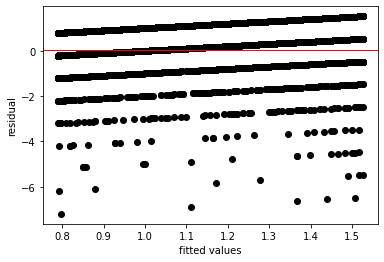

In [68]:
# Calculating the residuals
residuals = np.subtract(away_score_pred, away_score_test)

# Plotting the residual plot
plt.scatter(away_score_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [69]:
# Performing bartlett's test for heteroscedasticity
test_result, p_value = sp.stats.bartlett(away_score_pred.flatten(), residuals.flatten())
if p_value < 0.05:
  print('Reject null therefore variances are heteroscedastic')
else:
  print('Do not reject null therefore variances are homoscedastic')

Reject null therefore variances are heteroscedastic


The variances of the error terms vary significantly therefore our model is poorly defined and should be modified.

We could make improvements to the polynomial model by dropping outliers from our datasets?

# 7. Logistic approach

In [70]:
# Hot encoding the tournament variable and creating a new dataset with the variables we will need in logistic modelling
matches_log = pd.get_dummies(matches[['home_rank', 'away_rank', 'tournament', 'home_result']], columns=['tournament'], drop_first=True)
matches_log.head()

,home_rank,away_rank,home_result,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_AFC Challenge Cup,tournament_AFC Challenge Cup qualification,tournament_AFF Championship,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_Amílcar Cabral Cup,tournament_Baltic Cup,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa América qualification,tournament_Copa Paz del Chaco,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_Dragon Cup,tournament_Dunhill Cup,tournament_Dynasty Cup,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gold Cup qualification,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King Hassan II Tournament,tournament_King's Cup,tournament_Kirin Cup,tournament_Korea Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Millennium Cup,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nile Basin Tournament,tournament_Nordic Championship,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Oceania Nations Cup qualification,tournament_Pacific Games,tournament_Prime Minister's Cup,tournament_SAFF Cup,tournament_SKN Football Festival,tournament_Simba Tournament,tournament_South Pacific Games,tournament_Tournoi de France,tournament_UAFA Cup,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UNCAF Cup,tournament_UNIFFAC Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,65.0,86.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52.0,46.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59.0,35.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Splitting our dataset
#
X = matches_log.drop('home_result',axis=1)
y = matches_log['home_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

# Standard scaling our variables as they have different unit measures
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix to see which classifications we got right and wrong
print(confusion_matrix)
# Finding the accuracy of our model
print(accuracy_score(y_test, y_pred))

[[ 539   17  399]
 [ 264   10  533]
 [ 217   10 1387]]
0.5734597156398105


Our model correctly predicted 57% of scores. However, its prediction of draws is poor having correctly predicted only 10 draws out of 807. This is an area it could improve

Also the method I used to find the rank of a team on the date it played a match left out many records that could have made our model better. 